In [1]:
import dask.dataframe as dd
import pandas as pd
import numpy as np
import datetime
import os
from scipy.stats import fisher_exact
from statsmodels.stats.multitest import multipletests
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [2]:
# output directory
direction = "up"
species = "HR"
now = datetime.datetime.now()
line_enrichment = f'../data/line_enrichment_{direction}_{species}_{now.strftime("%y%m")}'
os.makedirs(line_enrichment, exist_ok=True)

In [3]:
def count_goslim(df, file_name: str):
    unique_gene_pairs = df.drop_duplicates(subset=['GOSlim GOA Accession(s)', 'Gene stable ID_human', 'Gene stable ID_rice'])
    goslim_counts = unique_gene_pairs.groupby(['GOSlim GOA Accession(s)', 'GOSlim GOA Description', 'GOSlim_domain']).size().reset_index(name='counts')
    goslim_counts = goslim_counts.sort_values(by='counts', ascending=False).copy()
    goslim_counts.reset_index(drop=True, inplace=True)
    results_directory = f'../data/{line_enrichment}/goslim_correspondence_counts_{direction}_{species}'
    os.makedirs(results_directory, exist_ok=True)
    goslim_counts.to_csv(f'{results_directory}/{file_name}', sep='\t', index=False)
    return goslim_counts

In [4]:
merged_df_goslim_pd = pd.read_csv('../data/GOSlim_merge_HR/GOslim_merge_common_goslim_correspondence_all.tsv', 
                                  sep='\t',
                                  low_memory=False)
merged_df_up = pd.read_csv('../data/circos_hr_UP_2311/combined_goslim_UP.tsv', sep='\t')

display(merged_df_goslim_pd, merged_df_up)

,GOSlim GOA Accession(s),GOSlim GOA Description,GOSlim_domain,Gene stable ID_human,Gene stable ID_rice
0,GO:0005886,plasma membrane,cellular_component,Os01g0100400,ENSG00000186092
1,GO:0005886,plasma membrane,cellular_component,Os01g0103600,ENSG00000186092
2,GO:0005886,plasma membrane,cellular_component,Os01g0104000,ENSG00000186092
3,GO:0005886,plasma membrane,cellular_component,Os01g0108000,ENSG00000186092
4,GO:0005886,plasma membrane,cellular_component,Os01g0110100,ENSG00000186092
...,...,...,...,...,...
205962886,GO:0045182,translation regulator activity,molecular_function,Os12g0507200,ENSG00000205916
205962887,GO:0045182,translation regulator activity,molecular_function,Os12g0541500,ENSG00000205916
205962888,GO:0045182,translation regulator activity,molecular_function,Os12g0607100,ENSG00000205916
205962889,GO:0045182,translation regulator activity,molecular_function,Os12g0617100,ENSG00000205916


,GOSlim GOA Accession(s),GOSlim GOA Description,GOSlim_domain,Gene stable ID_rice,Gene stable ID_human,Chromosome/scaffold name_rice,start1 (bp),end1 (bp),Chromosome/scaffold name_human,start2 (bp),end2 (bp),HN-score(HN5)_rice,HN-score(HN5)_human
0,GO:0003824,catalytic activity,molecular_function,Os04g0167875,ENSG00000178297,R_4,4644736,4644996,H_19,2360238,2426261,57,72
1,GO:0003824,catalytic activity,molecular_function,Os05g0135400,ENSG00000143199,R_5,2073613,2075302,H_1,167809386,167914215,61,97
2,GO:0003824,catalytic activity,molecular_function,Os02g0164000,ENSG00000143199,R_2,3441185,3446850,H_1,167809386,167914215,48,97
3,GO:0003824,catalytic activity,molecular_function,Os08g0473900,ENSG00000143199,R_8,23341289,23343299,H_1,167809386,167914215,48,97
4,GO:0003824,catalytic activity,molecular_function,Os09g0315700,ENSG00000143199,R_9,8692296,8697399,H_1,167809386,167914215,49,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15167,GO:0005198,structural molecule activity,molecular_function,Os01g0105800,ENSG00000184697,R_1,306871,308842,H_16,3014712,3020071,53,65
15168,GO:0005777,peroxisome,cellular_component,Os07g0529000,ENSG00000165507,R_7,20691213,20693521,H_10,44970981,44978809,59,70
15169,GO:0005777,peroxisome,cellular_component,Os06g0253100,ENSG00000165507,R_6,7940956,7941680,H_10,44970981,44978809,129,70
15170,GO:0045182,translation regulator activity,molecular_function,Os05g0373900,ENSG00000183655,R_5,18016742,18020353,H_15,85759326,85794925,42,74


In [5]:
gosilm_correspondence_up_counts = count_goslim(merged_df_up, f'goslim_correspondence_counts_{direction}.tsv')
goslim_correspondence_all_counts = count_goslim(merged_df_goslim_pd, 'goslim_correspondence_counts_all.tsv')

display(gosilm_correspondence_up_counts, goslim_correspondence_all_counts)

,GOSlim GOA Accession(s),GOSlim GOA Description,GOSlim_domain,counts
0,GO:0003824,catalytic activity,molecular_function,4136
1,GO:0005634,nucleus,cellular_component,3550
2,GO:0005829,cytosol,cellular_component,1248
3,GO:0016787,hydrolase activity,molecular_function,912
4,GO:0048856,anatomical structure development,biological_process,819
5,GO:0005886,plasma membrane,cellular_component,676
6,GO:0005576,extracellular region,cellular_component,600
7,GO:0005783,endoplasmic reticulum,cellular_component,588
8,GO:0003677,DNA binding,molecular_function,546
9,GO:0036211,protein modification process,biological_process,418


,GOSlim GOA Accession(s),GOSlim GOA Description,GOSlim_domain,counts
0,GO:0003824,catalytic activity,molecular_function,62834292
1,GO:0005634,nucleus,cellular_component,50586355
2,GO:0005886,plasma membrane,cellular_component,14121523
3,GO:0036211,protein modification process,biological_process,11265607
4,GO:0016740,transferase activity,molecular_function,10856023
5,GO:0016787,hydrolase activity,molecular_function,8674587
6,GO:0005829,cytosol,cellular_component,7811118
7,GO:0048856,anatomical structure development,biological_process,7216908
8,GO:0003677,DNA binding,molecular_function,5819761
9,GO:0003723,RNA binding,molecular_function,4482192


In [6]:
# for debugging purpose
total_counts_up = gosilm_correspondence_up_counts['counts'].sum()
total_counts_all = goslim_correspondence_all_counts['counts'].sum()


unique_rows_up = merged_df_up.drop_duplicates(subset=['GOSlim GOA Accession(s)', 'Gene stable ID_human', 'Gene stable ID_rice']).shape[0]
unique_rows_all = merged_df_goslim_pd.drop_duplicates(subset=['GOSlim GOA Accession(s)', 'Gene stable ID_human', 'Gene stable ID_rice']).shape[0]

print(f"Total counts: {unique_rows_all}")
print(f"up counts: {unique_rows_up}")
print(f"Counts match rows: {unique_rows_up == total_counts_up}")


Total counts: 205962891
up counts: 15172
Counts match rows: True


In [7]:

def fold_enrichment(df_goslim_up_counts, df_goslim_all_counts, unique_genes_up, unique_genes_all, file_name: str):
    """_summary_
    Args:
        df_goslim_up_counts (dataframe): _description_
        df_goslim_all_counts (dataframe): _description_
        unique_genes_up (): _description_
        unique_genes_all (dataframe): _description_
        file_name (str): _description_

    Returns:
        dataframe : _description_
    """
    merged_df = pd.merge(df_goslim_up_counts, 
                         df_goslim_all_counts,
                         on=['GOSlim GOA Accession(s)', 'GOSlim GOA Description', 'GOSlim_domain'], 
                         how='right', # if there is no match, fill with NaN or 0
                         suffixes=('_up', '_all'))
    
    merged_df['counts_up'] = merged_df['counts_up'].fillna(0)
    merged_df['counts_all'] = merged_df['counts_all'].fillna(0)
    merged_df['up_ratio'] = merged_df['counts_up'] / unique_genes_up
    merged_df['all_ratio'] = merged_df['counts_all'] / unique_genes_all
    merged_df['fold_enrichment'] = merged_df['up_ratio'] / merged_df['all_ratio']
    merged_df.replace([np.inf, -np.inf], np.nan, inplace=True) # inf -> nan
    results_directory = f'../data/{line_enrichment}/goslim_fold_enrichment_correspondence_{direction}_{species}'
    os.makedirs(results_directory, exist_ok=True)
    merged_df.to_csv(f'{results_directory}/{file_name}', sep='\t', index=False)
    
    return merged_df


goslim_correspondence_enrichment = fold_enrichment(gosilm_correspondence_up_counts, 
                                                   goslim_correspondence_all_counts, 
                                                   unique_rows_up, 
                                                   unique_rows_all, 
                                                   f'goslim_correspondence_fold_enrichment_{direction}.tsv')
display(goslim_correspondence_enrichment)

,GOSlim GOA Accession(s),GOSlim GOA Description,GOSlim_domain,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment
0,GO:0003824,catalytic activity,molecular_function,4136.0,62834292,0.272607,0.305076,0.893573
1,GO:0005634,nucleus,cellular_component,3550.0,50586355,0.233984,0.245609,0.952667
2,GO:0005886,plasma membrane,cellular_component,676.0,14121523,0.044556,0.068563,0.649847
3,GO:0036211,protein modification process,biological_process,418.0,11265607,0.027551,0.054697,0.503695
4,GO:0016740,transferase activity,molecular_function,204.0,10856023,0.013446,0.052709,0.255097
5,GO:0016787,hydrolase activity,molecular_function,912.0,8674587,0.060111,0.042117,1.427224
6,GO:0005829,cytosol,cellular_component,1248.0,7811118,0.082257,0.037925,2.168940
7,GO:0048856,anatomical structure development,biological_process,819.0,7216908,0.053981,0.035040,1.540561
8,GO:0003677,DNA binding,molecular_function,546.0,5819761,0.035987,0.028256,1.273602
9,GO:0003723,RNA binding,molecular_function,170.0,4482192,0.011205,0.021762,0.514878


## Q-value

In [8]:

def calculate_p_q_values(df_enrichment, unique_correspondence_up, unique_correspondence_all, file_name: str):
    p_values = []
    df_enrichment['counts_up'] = df_enrichment['counts_up'].astype(int) # float(0.0) to int(0)
    for index, row in df_enrichment.iterrows():
        if row['counts_up'] == 0:
            p_values.append(1.0)
        else:
            observed_up_correspondence = row['counts_up'] # create contingency table
            observed_all_correspondence = row['counts_all']
            observed_not_up_correspondence = observed_all_correspondence - observed_up_correspondence
            total_not_up_correspondence = unique_correspondence_all - unique_correspondence_up
            table = [
            [observed_up_correspondence, unique_correspondence_up - observed_up_correspondence],
            [observed_not_up_correspondence, total_not_up_correspondence - observed_not_up_correspondence]
            ]
            _, p_value = fisher_exact(table, alternative='greater') # Fisher's exact test
            p_values.append(p_value)
    
    _, q_values, _, _ = multipletests(p_values, 
                                      alpha=0.05, 
                                      method='fdr_bh') # Benjamini/Hochberg method
    
    df_enrichment['p_value'] = p_values
    df_enrichment['q_value'] = q_values

    results_directory = f'../data/{line_enrichment}/goslim_correspondence_q_values_{direction}_{species}'
    os.makedirs(results_directory, exist_ok=True)
    df_enrichment['GOSlim'] = df_enrichment['GOSlim GOA Accession(s)'] + ": " + df_enrichment['GOSlim GOA Description']
    cols = df_enrichment.columns.tolist()
    cols = [cols[-1]] + cols[:-1]
    df_enrichment = df_enrichment[cols]
    df_enrichment.drop(['GOSlim GOA Accession(s)', 'GOSlim GOA Description'], axis=1, inplace=True)
    df_enrichment = df_enrichment[df_enrichment['counts_up'] != 0]
    df_enrichment = df_enrichment.sort_values(by='fold_enrichment', ascending=False)
    df_enrichment.reset_index(drop=True, inplace=True)
    df_enrichment.to_csv(f'{results_directory}/{file_name}', sep='\t', index=False)

    return df_enrichment

goslim_correspondence_with_p_q = calculate_p_q_values(goslim_correspondence_enrichment.copy(),
                                                      unique_rows_up,
                                                      unique_rows_all, 
                                                      f'goslim_correspondence_fold_enrichment_p_q_{direction}.tsv')


display(goslim_correspondence_with_p_q)

,GOSlim,GOSlim_domain,counts_up,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0005783: endoplasmic reticulum,cellular_component,588,1919256,0.038756,0.009318,4.159016,2.539107e-175,8.632965e-174
1,GO:0006091: generation of precursor metabolite...,biological_process,55,265631,0.003625,0.001290,2.810801,3.966800e-11,1.685890e-10
2,GO:0008289: lipid binding,molecular_function,49,257535,0.003230,0.001250,2.582890,6.223319e-09,2.351032e-08
3,GO:0140110: transcription regulator activity,molecular_function,396,2256826,0.026101,0.010957,2.382008,1.889550e-52,1.606117e-51
4,GO:0005829: cytosol,cellular_component,1248,7811118,0.082257,0.037925,2.168940,8.805413e-137,1.496920e-135
5,GO:0005576: extracellular region,cellular_component,600,3845282,0.039547,0.018670,2.118211,9.704598e-62,1.099854e-60
6,GO:0005739: mitochondrion,cellular_component,280,1951236,0.018455,0.009474,1.948024,3.221263e-24,1.564614e-23
7,GO:0005975: carbohydrate metabolic process,biological_process,84,676139,0.005537,0.003283,1.686512,5.992973e-06,1.852373e-05
8,GO:0048856: anatomical structure development,biological_process,819,7216908,0.053981,0.035040,1.540561,2.844564e-32,1.934304e-31
9,GO:0005777: peroxisome,cellular_component,2,18172,0.000132,0.000088,1.494078,3.868057e-01,1.000000e+00


In [9]:
goslim_correspondence_with_p_q.rename(columns={'counts_up': 'line counts'}, inplace=True)
cc = goslim_correspondence_with_p_q.loc[goslim_correspondence_with_p_q['GOSlim_domain'] == 'cellular_component']
bp = goslim_correspondence_with_p_q.loc[goslim_correspondence_with_p_q['GOSlim_domain'] == 'biological_process']
mf = goslim_correspondence_with_p_q.loc[goslim_correspondence_with_p_q['GOSlim_domain'] == 'molecular_function']

cc.reset_index(drop=True, inplace=True)
bp.reset_index(drop=True, inplace=True)
mf.reset_index(drop=True, inplace=True)

display(cc, bp, mf)

,GOSlim,GOSlim_domain,line counts,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0005783: endoplasmic reticulum,cellular_component,588,1919256,0.038756,0.009318,4.159016,2.539107e-175,8.632965e-174
1,GO:0005829: cytosol,cellular_component,1248,7811118,0.082257,0.037925,2.168940,8.805413e-137,1.496920e-135
2,GO:0005576: extracellular region,cellular_component,600,3845282,0.039547,0.018670,2.118211,9.704598e-62,1.099854e-60
3,GO:0005739: mitochondrion,cellular_component,280,1951236,0.018455,0.009474,1.948024,3.221263e-24,1.564614e-23
4,GO:0005777: peroxisome,cellular_component,2,18172,0.000132,0.000088,1.494078,3.868057e-01,1.000000e+00
5,GO:0005773: vacuole,cellular_component,32,422166,0.002109,0.002050,1.028994,4.594621e-01,1.000000e+00
6,GO:0005634: nucleus,cellular_component,3550,50586355,0.233984,0.245609,0.952667,9.996001e-01,1.000000e+00
7,GO:0005654: nucleoplasm,cellular_component,80,1522420,0.005273,0.007392,0.713348,9.994202e-01,1.000000e+00
8,GO:0005886: plasma membrane,cellular_component,676,14121523,0.044556,0.068563,0.649847,1.000000e+00,1.000000e+00
9,GO:0005856: cytoskeleton,cellular_component,30,725760,0.001977,0.003524,0.561144,9.998176e-01,1.000000e+00


,GOSlim,GOSlim_domain,line counts,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0006091: generation of precursor metabolite...,biological_process,55,265631,0.003625,0.001290,2.810801,3.966800e-11,1.685890e-10
1,GO:0005975: carbohydrate metabolic process,biological_process,84,676139,0.005537,0.003283,1.686512,5.992973e-06,1.852373e-05
2,GO:0048856: anatomical structure development,biological_process,819,7216908,0.053981,0.035040,1.540561,2.844564e-32,1.934304e-31
3,GO:0006629: lipid metabolic process,biological_process,102,1517670,0.006723,0.007369,0.912366,8.357564e-01,1.000000e+00
4,GO:0030154: cell differentiation,biological_process,49,1272360,0.003230,0.006178,0.522796,9.999999e-01,1.000000e+00
5,GO:0036211: protein modification process,biological_process,418,11265607,0.027551,0.054697,0.503695,1.000000e+00,1.000000e+00


,GOSlim,GOSlim_domain,line counts,counts_all,up_ratio,all_ratio,fold_enrichment,p_value,q_value
0,GO:0008289: lipid binding,molecular_function,49,257535,0.003230,0.001250,2.582890,6.223319e-09,2.351032e-08
1,GO:0140110: transcription regulator activity,molecular_function,396,2256826,0.026101,0.010957,2.382008,1.889550e-52,1.606117e-51
2,GO:0016787: hydrolase activity,molecular_function,912,8674587,0.060111,0.042117,1.427224,1.506186e-25,8.535052e-25
3,GO:0003677: DNA binding,molecular_function,546,5819761,0.035987,0.028256,1.273602,1.870129e-08,6.358439e-08
4,GO:0003824: catalytic activity,molecular_function,4136,62834292,0.272607,0.305076,0.893573,1.000000e+00,1.000000e+00
5,GO:0005215: transporter activity,molecular_function,80,1929898,0.005273,0.009370,0.562732,1.000000e+00,1.000000e+00
6,GO:0003723: RNA binding,molecular_function,170,4482192,0.011205,0.021762,0.514878,1.000000e+00,1.000000e+00
7,GO:0045182: translation regulator activity,molecular_function,1,30420,0.000066,0.000148,0.446259,8.936585e-01,1.000000e+00
8,GO:0016740: transferase activity,molecular_function,204,10856023,0.013446,0.052709,0.255097,1.000000e+00,1.000000e+00
9,GO:0005198: structural molecule activity,molecular_function,12,650310,0.000791,0.003157,0.250500,1.000000e+00,1.000000e+00


In [10]:
def plot_goslim_dotplot_with_lines(data, x_col, y_col, size_col, hue_col, ylabel_suffix='', figsize=(6, 9), palette="flare"):
    # add -log10(q-value) column
    data['-log10(q-value)'] = -np.log10(data[hue_col]).copy()
    # color palette
    color_palette = sns.color_palette(palette, as_cmap=True)
    norm = mcolors.Normalize(vmin=data['-log10(q-value)'].min(), vmax=data['-log10(q-value)'].max())
    
    # plotting
    plt.figure(figsize=figsize)
    ax = sns.scatterplot(
        data=data,
        x=x_col,
        y=y_col,
        size=size_col, 
        hue='-log10(q-value)',     
        palette=palette, 
        legend='brief'
    )
    # lines 
    for index, row in data.iterrows():
        plt.plot([0, row[x_col]], [row[y_col], row[y_col]], color=color_palette(norm(row['-log10(q-value)'])), lw=1)
    
    plt.grid(color='b', linestyle=':', linewidth=0.1)
    plt.xlabel('Fold Enrichment')
    ylabel_text = 'Common GOSlim Terms' + ylabel_suffix  if ylabel_suffix else ''
    plt.ylabel(ylabel_text)

    plt.show()

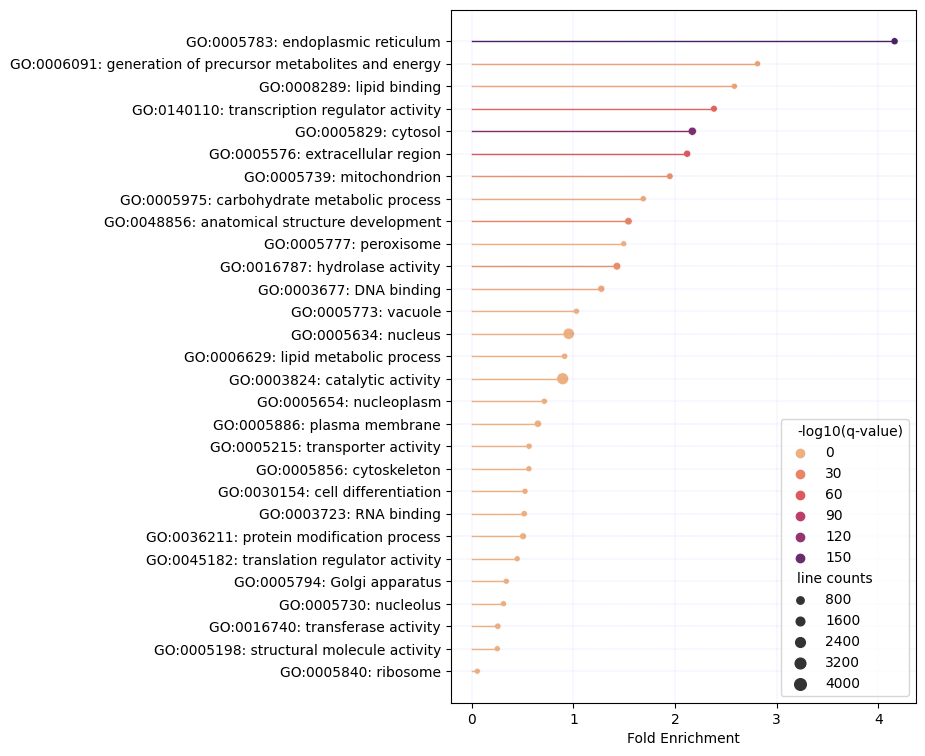

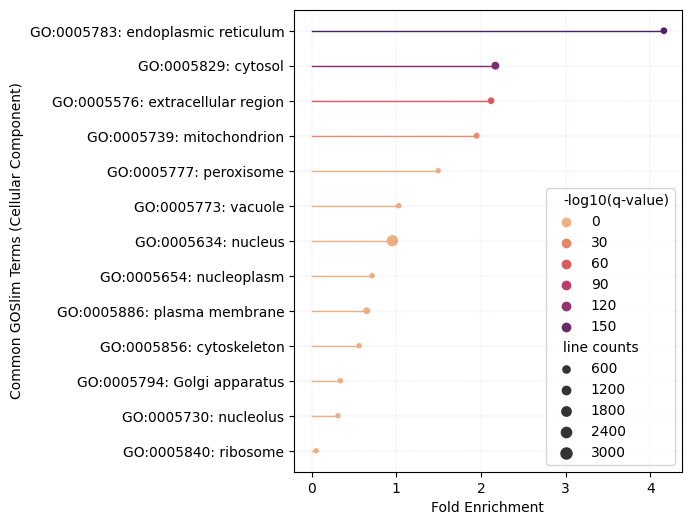

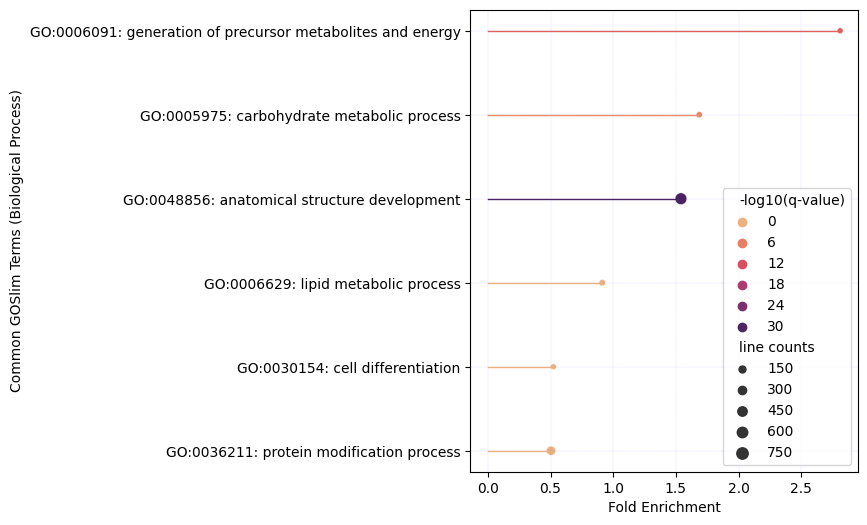

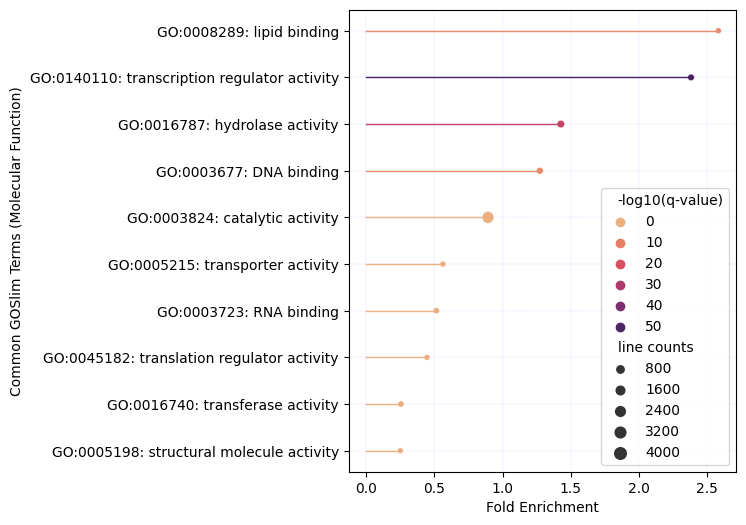

In [11]:
plot_goslim_dotplot_with_lines(goslim_correspondence_with_p_q.copy(), 'fold_enrichment', 'GOSlim', 'line counts', 'q_value', ylabel_suffix='') # add copy() to avoid SettingWithCopyWarning
plot_goslim_dotplot_with_lines(cc.copy(), 'fold_enrichment', 'GOSlim', 'line counts', 'q_value', ylabel_suffix=' (Cellular Component)', figsize=(5, 6))
plot_goslim_dotplot_with_lines(bp.copy(), 'fold_enrichment', 'GOSlim', 'line counts', 'q_value', ylabel_suffix=' (Biological Process)', figsize=(5, 6))
plot_goslim_dotplot_with_lines(mf.copy(), 'fold_enrichment', 'GOSlim', 'line counts', 'q_value', ylabel_suffix=' (Molecular Function)', figsize=(5, 6))